### Ingest Data

In [1]:
import datetime
from packaging import version
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import time

In [2]:
#!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
!wget https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip 

--2022-02-20 19:41:15--  https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/erinmcmahon26/MNIST-Digit-Recognizer/archive/refs/heads/main.zip [following]
--2022-02-20 19:41:16--  https://github.com/erinmcmahon26/MNIST-Digit-Recognizer/archive/refs/heads/main.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer/zip/refs/heads/main [following]
--2022-02-20 19:41:16--  https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP 

In [5]:
!unzip "/content/main.zip" -d "/content/output_folder/"

Archive:  /content/main.zip
3d4622d706c58e09f3abf7417604d33df0f74ca7
   creating: /content/output_folder/MNIST-Digit-Recognizer-main/
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/Digit_Recognizer_NN.ipynb  
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/MNIST_Digit_Recognizer.ipynb  
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/README.md  
 extracting: /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip  
 extracting: /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip  


In [6]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv  


In [7]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv  


In [8]:
df_train = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv')

In [9]:
df_test = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv')

### EDA

In [10]:
y = df_train['label']
x = df_train.drop(columns = ['label'])

In [11]:
test = df_test

In [12]:
x = x/255
test = test/255

In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.20)

In order to use keras, every image needs to be represented as a 28x28 array instead of a 1D array of size 784. We need to do this for all x values for train and test. 

In [14]:
x_train = x_train.values.reshape(x_train.shape[0], 28,28,1)
x_valid = x_valid.values.reshape(x_valid.shape[0], 28,28,1)
test = test.values.reshape(test.shape[0], 28,28,1)

### Models

#### Base NN Model

In [15]:
model = Sequential([keras.layers.Flatten(input_shape=[28,28]), 
                    keras.layers.Dense(300, activation='relu'), 
                    keras.layers.Dense(100, activation='relu'),
                    keras.layers.Dense(10, activation='softmax')])

Sequential: most simple keras model which is composed of a single stack of layers connected sequnetially. 

Flatten: convert each image into a 1D array.

Dense: each dense layer manages its own weight matrix which contains all connection weights between neurons and their inputs. 'relu' uses the ReLU activation function which is a piecewise linear function that will output the input directly if it is positive or output zero if it is not. 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Summary shows all of the model's layers, it's output shape, and number of parameters. This summary is stating that all parameters are trainable. 

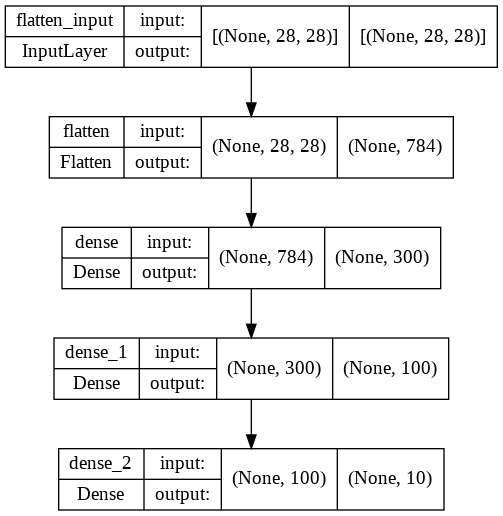

In [17]:
keras.utils.plot_model(model, show_shapes=True) 

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

sparse_categorical_crossentropy: we have sparse labels, meaning that there is just an index from 0-9 for our labels

sgd: training the model using simple Stochastic Gradient Descent

accuracy: measure accuracy of model 

In [19]:
history = model.fit(x_train, y_train, epochs=30, 
                    validation_split=0.1)

Epoch 1/30
945/945 [==============================] - 7s 6ms/step - loss: 0.7950 - accuracy: 0.8055 - val_loss: 0.3908 - val_accuracy: 0.8872
Epoch 2/30
945/945 [==============================] - 3s 4ms/step - loss: 0.3384 - accuracy: 0.9052 - val_loss: 0.3139 - val_accuracy: 0.9024
Epoch 3/30
945/945 [==============================] - 3s 4ms/step - loss: 0.2796 - accuracy: 0.9195 - val_loss: 0.2730 - val_accuracy: 0.9185
Epoch 4/30
945/945 [==============================] - 3s 4ms/step - loss: 0.2447 - accuracy: 0.9298 - val_loss: 0.2485 - val_accuracy: 0.9226
Epoch 5/30
945/945 [==============================] - 3s 4ms/step - loss: 0.2186 - accuracy: 0.9376 - val_loss: 0.2268 - val_accuracy: 0.9307
Epoch 6/30
945/945 [==============================] - 3s 4ms/step - loss: 0.1973 - accuracy: 0.9443 - val_loss: 0.2129 - val_accuracy: 0.9330
Epoch 7/30
945/945 [==============================] - 4s 4ms/step - loss: 0.1804 - accuracy: 0.9494 - val_loss: 0.1946 - val_accuracy: 0.9384
Epoch 

Keras is measuring the loss and extra metrics on the data set at each epoch which gives us a good indication of how the model is actually performing. Validation accuracy reached 97% after 30 epochs which is close to the training accuracy of 98.8%. 

(0.0, 1.0)

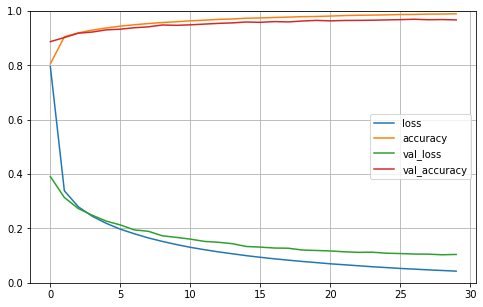

In [20]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

Here we see that both training accuracy and validation accuracy increased during training and training loss and validation loss decreased. The training and validation curves are close to each other but not completely overlapping which shows that there is not much overfitting, just slightly at the earlier epochs. 

In [21]:
model.evaluate(x_valid, y_valid)

263/263 [==============================] - 1s 3ms/step - loss: 0.1143 - accuracy: 0.9689


[0.11430361866950989, 0.9689285755157471]

Running the model on the validation set of our training dataset shows us that the model is about 98% accurate. 

In [22]:
preds = model.predict(x_valid)
print('shape of preds:', preds.shape)

shape of preds: (8400, 10)


In [23]:
def cm_matrix(model, x_v, y_v):
  pred = model.predict(x_v)
  pred_classes = np.argmax(pred, axis=1)
  labels = [0,1,2,3,4,5,6,7,8,9]
  cm = confusion_matrix(y_v, pred_classes)
  sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")

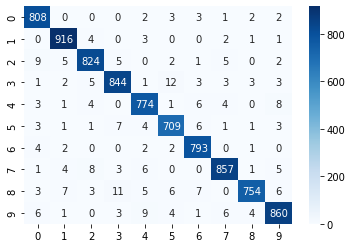

In [24]:
cm_matrix(model, x_valid, y_valid)

#### NN Layer and Node Experiment

In [25]:
# can't seem to get the building the model to work well
#def build_model(x, y, n_hidden, n_neurons):
#  model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28])])
#  for layers in range(n_hidden):
#    model.add(keras.layers.Dense(n_neurons, activation='relu'))
#  model.add(keras.layers.Dense(10))
#  model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#  return model

In [26]:
def model_metrics(model, x, y):
  start = time.time()
  model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])
  history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
  end = time.time()
  totaltime = end - start
  pd.DataFrame(history.history).plot(figsize=(8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()
  metrics = {'Time': round(totaltime, 3), 'Training Accuracy': round(history.history['acc'][-1], 3), 
             'Validation Accuracy': round(history.history['val_acc'][-1], 3)}
  return history, metrics 

##### Layers = 3, Nodes = 310

Epoch 1/10
945/945 [==============================] - 4s 3ms/step - loss: 0.8372 - acc: 0.7899 - val_loss: 0.4012 - val_acc: 0.8905
Epoch 2/10
945/945 [==============================] - 3s 3ms/step - loss: 0.3496 - acc: 0.8998 - val_loss: 0.3179 - val_acc: 0.9071
Epoch 3/10
945/945 [==============================] - 3s 3ms/step - loss: 0.2923 - acc: 0.9160 - val_loss: 0.2765 - val_acc: 0.9187
Epoch 4/10
945/945 [==============================] - 3s 3ms/step - loss: 0.2584 - acc: 0.9257 - val_loss: 0.2650 - val_acc: 0.9196
Epoch 5/10
945/945 [==============================] - 3s 3ms/step - loss: 0.2333 - acc: 0.9336 - val_loss: 0.2362 - val_acc: 0.9312
Epoch 6/10
945/945 [==============================] - 3s 3ms/step - loss: 0.2126 - acc: 0.9400 - val_loss: 0.2277 - val_acc: 0.9336
Epoch 7/10
945/945 [==============================] - 3s 3ms/step - loss: 0.1954 - acc: 0.9440 - val_loss: 0.2075 - val_acc: 0.9381
Epoch 8/10
945/945 [==============================] - 3s 3ms/step - loss: 0.

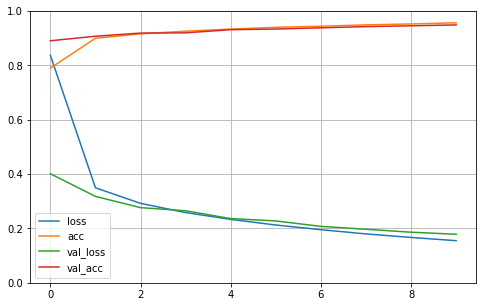

In [27]:
model_a = Sequential([keras.layers.Flatten(input_shape=[28,28]), 
                    keras.layers.Dense(200, activation='relu'), 
                    keras.layers.Dense(100, activation='relu'),
                    keras.layers.Dense(10, activation='softmax')])
history_a, metrics_a = model_metrics(model_a, x_train, y_train)

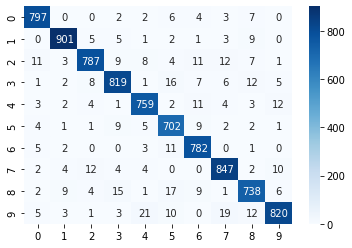

In [28]:
cm_matrix(model_a, x_valid, y_valid)

##### Layers = 3, Nodes = 460

Epoch 1/10
945/945 [==============================] - 4s 4ms/step - loss: 0.8258 - acc: 0.7981 - val_loss: 0.4006 - val_acc: 0.8899
Epoch 2/10
945/945 [==============================] - 4s 4ms/step - loss: 0.3476 - acc: 0.9021 - val_loss: 0.3159 - val_acc: 0.9054
Epoch 3/10
945/945 [==============================] - 3s 4ms/step - loss: 0.2873 - acc: 0.9178 - val_loss: 0.2780 - val_acc: 0.9185
Epoch 4/10
945/945 [==============================] - 3s 4ms/step - loss: 0.2524 - acc: 0.9265 - val_loss: 0.2571 - val_acc: 0.9202
Epoch 5/10
945/945 [==============================] - 4s 4ms/step - loss: 0.2269 - acc: 0.9355 - val_loss: 0.2354 - val_acc: 0.9286
Epoch 6/10
945/945 [==============================] - 4s 4ms/step - loss: 0.2057 - acc: 0.9415 - val_loss: 0.2202 - val_acc: 0.9324
Epoch 7/10
945/945 [==============================] - 4s 4ms/step - loss: 0.1889 - acc: 0.9460 - val_loss: 0.2028 - val_acc: 0.9363
Epoch 8/10
945/945 [==============================] - 3s 4ms/step - loss: 0.

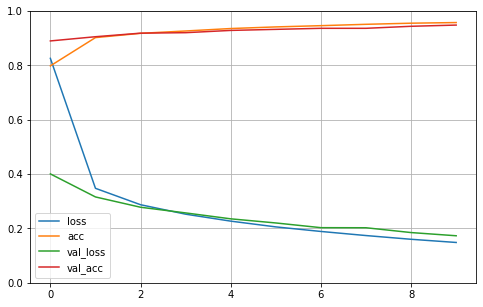

In [29]:
model_b = Sequential([keras.layers.Flatten(input_shape=[28,28]), 
                    keras.layers.Dense(300, activation='relu'), 
                    keras.layers.Dense(150, activation='relu'),
                    keras.layers.Dense(10, activation='softmax')])
history_b, metrics_b = model_metrics(model_b, x_train, y_train)

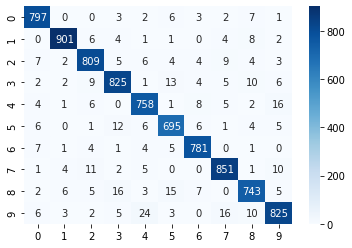

In [30]:
cm_matrix(model_b, x_valid, y_valid)

##### Layers = 5, Nodes = 310

Epoch 1/10
945/945 [==============================] - 3s 3ms/step - loss: 1.0060 - acc: 0.7036 - val_loss: 0.4047 - val_acc: 0.8815
Epoch 2/10
945/945 [==============================] - 2s 3ms/step - loss: 0.3542 - acc: 0.8951 - val_loss: 0.3042 - val_acc: 0.9071
Epoch 3/10
945/945 [==============================] - 2s 3ms/step - loss: 0.2751 - acc: 0.9183 - val_loss: 0.2760 - val_acc: 0.9158
Epoch 4/10
945/945 [==============================] - 2s 3ms/step - loss: 0.2281 - acc: 0.9316 - val_loss: 0.2415 - val_acc: 0.9229
Epoch 5/10
945/945 [==============================] - 3s 3ms/step - loss: 0.1952 - acc: 0.9416 - val_loss: 0.2053 - val_acc: 0.9354
Epoch 6/10
945/945 [==============================] - 2s 3ms/step - loss: 0.1707 - acc: 0.9475 - val_loss: 0.1883 - val_acc: 0.9387
Epoch 7/10
945/945 [==============================] - 2s 3ms/step - loss: 0.1489 - acc: 0.9563 - val_loss: 0.1825 - val_acc: 0.9405
Epoch 8/10
945/945 [==============================] - 2s 3ms/step - loss: 0.

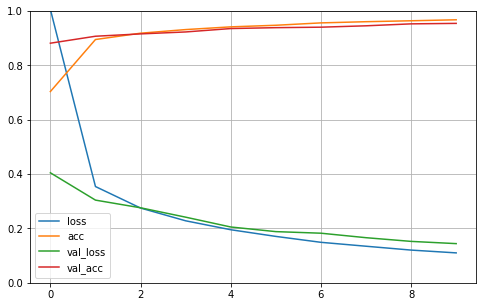

In [31]:
model_c = Sequential([keras.layers.Flatten(input_shape=[28,28]), 
                    keras.layers.Dense(110, activation='relu'),
                    keras.layers.Dense(90, activation='relu'),
                    keras.layers.Dense(60, activation='relu'), 
                    keras.layers.Dense(30, activation='relu'),
                    keras.layers.Dense(10, activation='softmax')])
histroy_c, metrics_c = model_metrics(model_c, x_train, y_train)

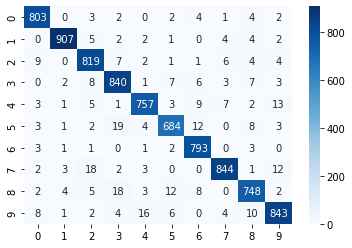

In [32]:
cm_matrix(model_c, x_valid, y_valid)

##### Layers = 5, Nodes = 460

Epoch 1/10
945/945 [==============================] - 3s 3ms/step - loss: 1.0053 - acc: 0.7036 - val_loss: 0.4415 - val_acc: 0.8717
Epoch 2/10
945/945 [==============================] - 2s 3ms/step - loss: 0.3521 - acc: 0.8975 - val_loss: 0.3207 - val_acc: 0.9065
Epoch 3/10
945/945 [==============================] - 2s 2ms/step - loss: 0.2749 - acc: 0.9184 - val_loss: 0.2544 - val_acc: 0.9220
Epoch 4/10
945/945 [==============================] - 2s 3ms/step - loss: 0.2318 - acc: 0.9310 - val_loss: 0.2308 - val_acc: 0.9283
Epoch 5/10
945/945 [==============================] - 3s 3ms/step - loss: 0.1995 - acc: 0.9409 - val_loss: 0.2035 - val_acc: 0.9378
Epoch 6/10
945/945 [==============================] - 2s 3ms/step - loss: 0.1744 - acc: 0.9473 - val_loss: 0.1941 - val_acc: 0.9375
Epoch 7/10
945/945 [==============================] - 2s 2ms/step - loss: 0.1539 - acc: 0.9532 - val_loss: 0.1832 - val_acc: 0.9423
Epoch 8/10
945/945 [==============================] - 2s 2ms/step - loss: 0.

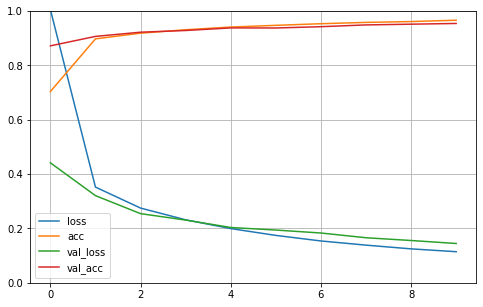

In [33]:
model_d = Sequential([keras.layers.Flatten(input_shape=[28,28]), 
                    keras.layers.Dense(100, activation='relu'),
                    keras.layers.Dense(90, activation='relu'),
                    keras.layers.Dense(60, activation='relu'), 
                    keras.layers.Dense(40, activation='relu'),
                    keras.layers.Dense(10, activation='softmax')])
history_d, metrics_d = model_metrics(model_d, x_train, y_train)

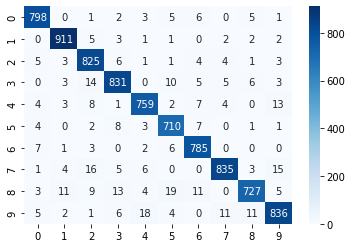

In [34]:
cm_matrix(model_d, x_valid, y_valid)

### Conclusion

In [35]:
list_of_metrics = [metrics_a, metrics_b, metrics_c, metrics_d]
results = pd.DataFrame(list_of_metrics, columns = ['Time','Training Accuracy','Validation Accuracy'])
results

,Time,Training Accuracy,Validation Accuracy
0,30.639,0.956,0.949
1,41.476,0.958,0.948
2,41.570,0.968,0.954
3,24.996,0.966,0.954


Based on the few models run, the best model was model_d which used 5 layers and 300 nodes. Not only did it perform the best on both the training and validation sets, it also ran the fastest. 

In [36]:
# create submission:
#Y_pred = model_d.predict(test)
#Y_pred_classes = np.argmax(Y_pred, axis = 1) 

#predict = pd.DataFrame(Y_pred_classes)
#predict.index.rename('ImageID', inplace=True)
#predict.index += 1
#predict.columns =['Label']

#predict.to_csv('prediction.csv')